#📌 Extração

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = '/content/df_limpo.csv'
df = pd.read_csv(url)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [15]:
# Ver as colunas disponíveis
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [16]:
#verificar a estrutura geral
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

#🛠️ Preparação dos Dados

 ✔️ Remover colunas irrelevantes

Na etapa de remoção de colunas irrelevantes, o objetivo é excluir variáveis que:


*   Não têm valor preditivo (ex: identificadores únicos).
*   São reduntantes com outras.
*   Podem causar vazamento de dados (data leakage).



In [19]:
# Drop columns 'customerID' and 'Churn' from df_encoded
df_encoded = df_encoded.drop(columns=['customerID', 'Churn'], errors='ignore')

# Encoding

In [18]:
# para criar um novo
df_clean = df.copy()

# === Etapa 1: Agrupar "No internet service" como "No"
cols_to_fix = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

# === Etapa 2: One-hot encoding (sem dummy trap)
categorical_cols = [
       'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'
]

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Pronto para usar!
df_encoded

,customerID,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0002-ORFBO,0,9,2.20,65.60,593.30,False,False,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0003-MKNFE,0,9,2.01,59.90,542.40,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
2,0004-TLHLJ,0,4,2.34,73.90,280.85,True,True,False,False,...,True,False,False,False,False,False,True,False,True,False
3,0011-IGKFF,1,13,3.17,98.00,1237.85,True,True,True,False,...,True,False,True,True,False,False,True,False,True,False
4,0013-EXCHZ,1,3,2.97,83.90,267.40,True,False,True,False,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,13,1.90,55.15,742.90,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True
7039,9992-RRAMN,0,22,2.84,85.10,1873.70,True,True,True,False,...,False,False,False,True,False,False,True,False,True,False
7040,9992-UJOEL,0,2,1.55,50.30,92.75,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
7041,9993-LHIEB,0,67,2.30,67.85,4627.65,False,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [20]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   Total.Day                                      7032 non-null   float64
 3   account.Charges.Monthly                        7043 non-null   float64
 4   account.Charges.Total                          7032 non-null   float64
 5   Churn_Yes                                      7043 non-null   bool   
 6   customer.gender_Male                           7043 non-null   bool   
 7   customer.Partner_Yes                           7043 non-null   bool   
 8   customer.Dependents_Yes                        7043 non-null   bool   
 9   phone.PhoneService_Yes                         7043 

✔️ Verificação novamente dos valores nulos

In [21]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,11
account.Charges.Monthly,0
account.Charges.Total,11
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


**Tratamento de valores nulos**

Ao identificar valores nulos nas colunas `Total.Day` e `account.Charges.Total`, é necessário decidir entre **excluir** ou **preencher** essas entradas.

* **Excluir linhas**: como o número de valores nulos é pequeno (11 linhas em mais de 7 mil), podemos remover essas linhas sem prejudicar a análise. Isso evita introduzir distorções nos resultados.

* **Substituir por zero**: essa abordagem pode ser usada quando o valor nulo representa a ausência de um dado ou serviço (por exemplo, nenhuma cobrança), mas pode distorcer médias e somas se não for o caso real.

Neste projeto, optamos por **excluir as linhas com valores nulos** por segurança e simplicidade, garantindo que os dados usados estejam completos.


In [22]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,11
account.Charges.Monthly,0
account.Charges.Total,11
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


#### Tirando os valores nulos das colunas `Total.Day` e `account.Charges.Total`

In [23]:
print(df_encoded[['Total.Day', 'account.Charges.Total']].isnull().sum())

Total.Day                11
account.Charges.Total    11
dtype: int64


In [24]:
df_encoded = df_encoded.dropna(subset=['Total.Day', 'account.Charges.Total'])

In [25]:
print(df_encoded[['Total.Day', 'account.Charges.Total']].isnull().sum())

Total.Day                0
account.Charges.Total    0
dtype: int64


✔️ Normalização/Padronização

🔄 Normalização dos dados

A normalização é uma etapa comum no pré-processamento de dados, especialmente importante para algoritmos que são **sensíveis à escala dos atributos**, como:

* KNN (K-Nearest Neighbors)
* Redes Neurais
* Regressão Logística
* SVM (Support Vector Machine)

Modelos baseados em árvores (como Decision Tree, Random Forest e XGBoost) **não exigem normalização**, pois não dependem da escala dos dados para construir suas regras de decisão.

Neste projeto, aplicaremos a **normalização Min-Max**, que transforma os valores para o intervalo **\[0, 1]**. Isso ajuda a garantir que todas as variáveis numéricas contribuam de forma equilibrada para o modelo.

```python
from sklearn.preprocessing import MinMaxScaler

# Selecionando apenas colunas numéricas (exceto a variável target, se já estiver separada)
colunas_numericas = dados.select_dtypes(include=['int64', 'float64']).columns

# Inicializando o scaler
scaler = MinMaxScaler()

# Aplicando a normalização
dados[colunas_numericas] = scaler.fit_transform(dados[colunas_numericas])

# Exibindo os dados normalizados
dados.head()
```



## ≡ Correlação entre as variáveis

In [28]:
corr = df_encoded.corr()

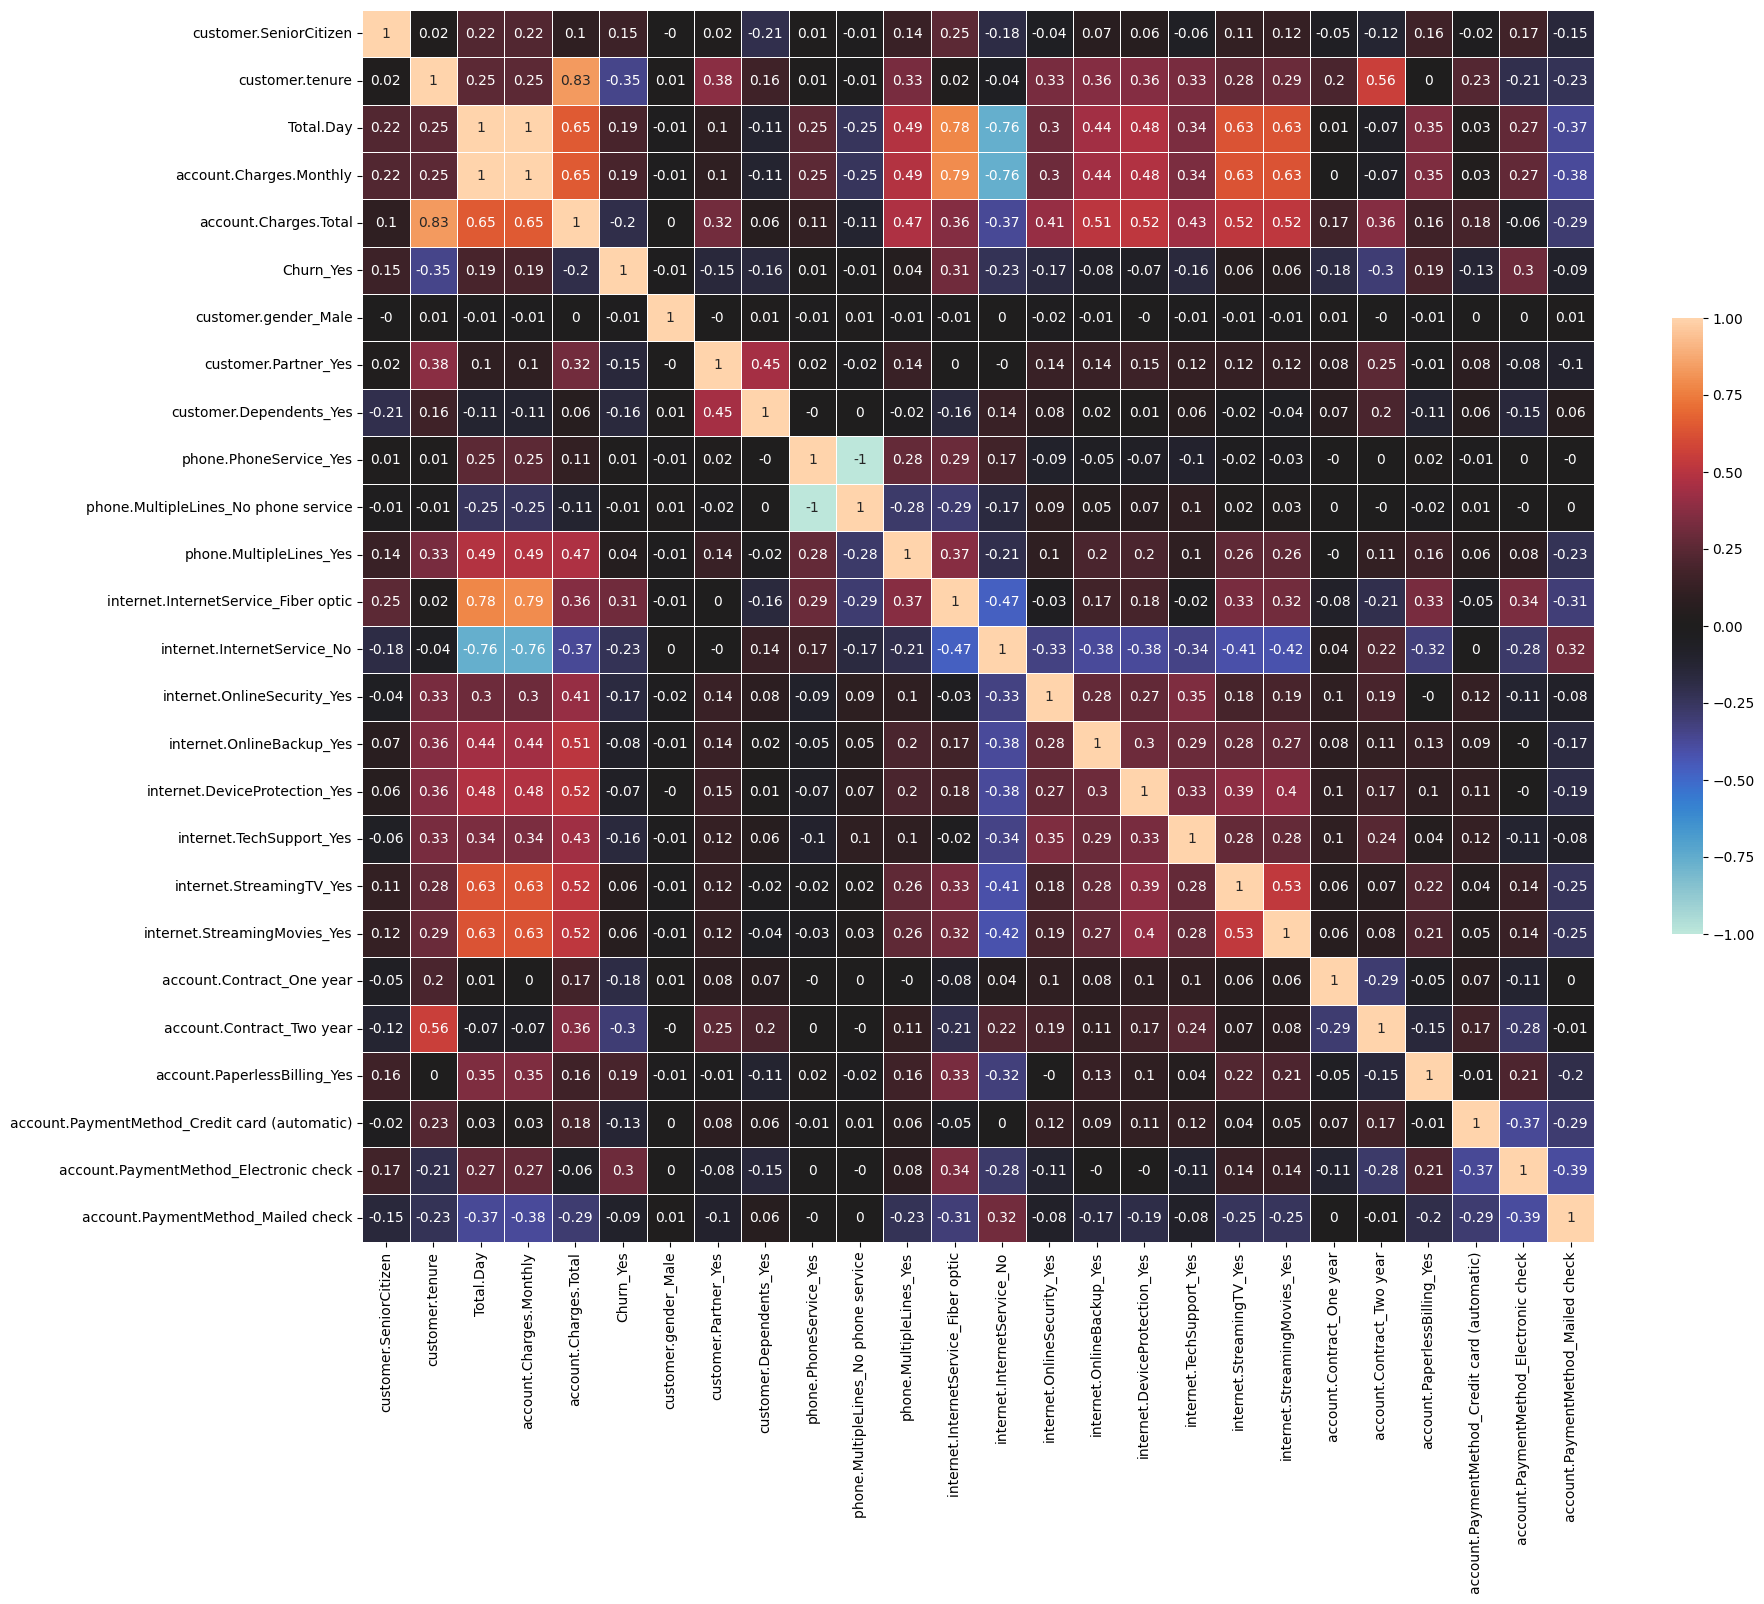

In [27]:
import numpy as np # Import the numpy library

fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

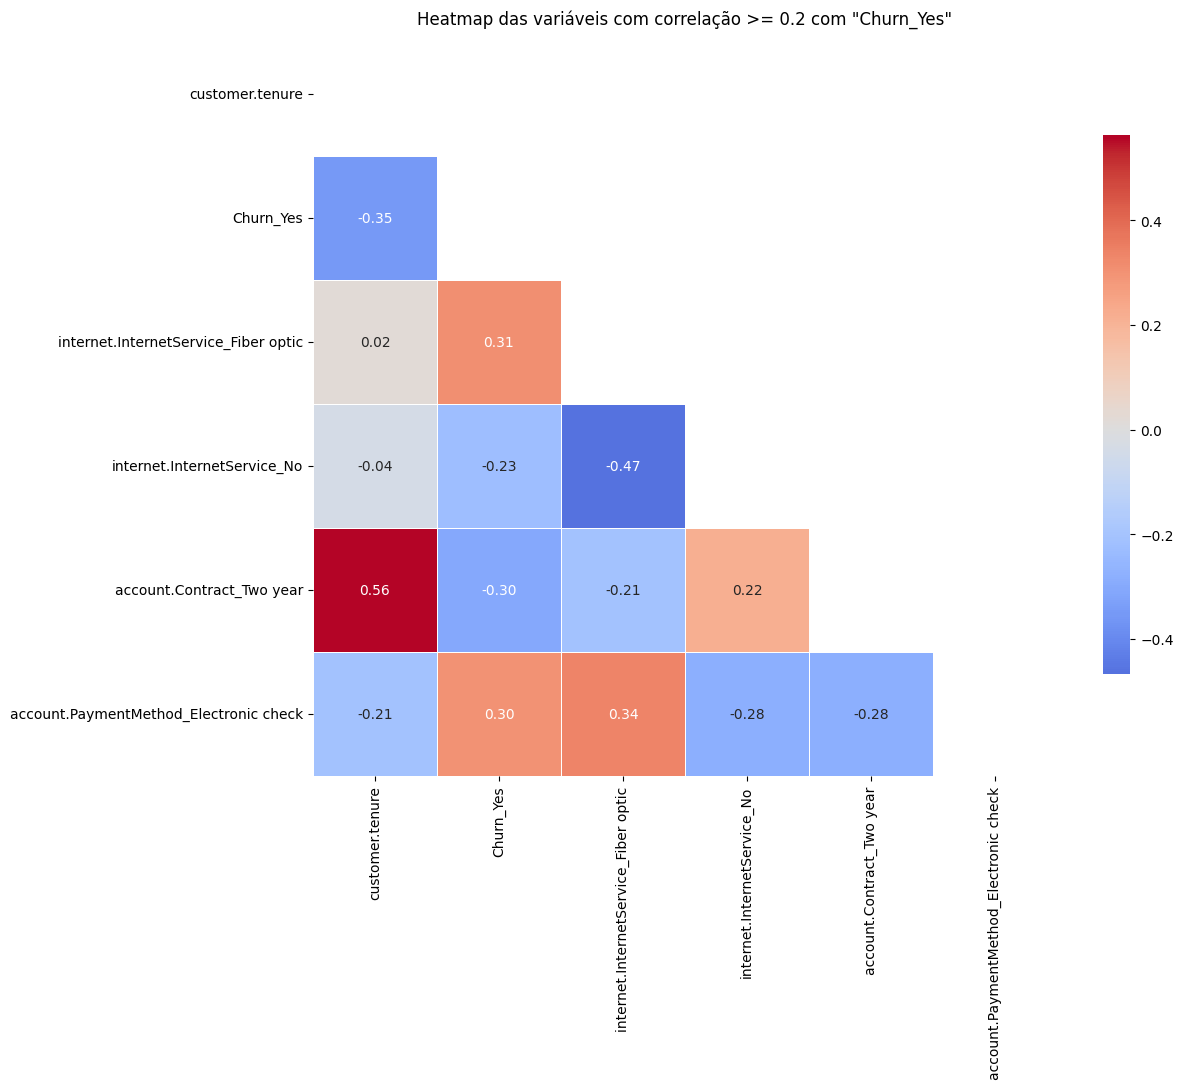

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


# Definir a variável alvo
target_var = 'Churn_Yes'

# Definir o limiar mínimo de correlação absoluta para seleção
limiar = 0.2

# Filtrar variáveis que tenham correlação absoluta >= limiar com a variável alvo
# Isso cria uma lista com as variáveis relevantes
variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

# Garantir que a variável alvo está na lista (se não estiver, adiciona)
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# Criar uma matriz de correlação somente com as variáveis selecionadas
corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

# Gerar uma máscara para esconder o triângulo superior da matriz (incluindo diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Plotar o heatmap com a máscara aplicada para melhor visualização
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap das variáveis com correlação >= {limiar} com "{target_var}"')
plt.show()

_______________________________________________________



✅ **Análise do novo heatmap de correlação**

> Lembrando que o gráfico mostra **correlações ≥ 0.2** (ou ≤ -0.2) com a variável-alvo `Churn_Yes`.

---

🔍 **Correlação com `Churn_Yes` (variável alvo)**

| Variável                                 | Correlação com Churn\_Yes | Interpretação                                                                                                   |
| ---------------------------------------- | ------------------------- | --------------------------------------------------------------------------------------------------------------- |
| `internet.InternetService_Fiber optic`   | **+0.31**                 | Clientes com fibra ótica têm **maior chance de churn**. Pode estar relacionado ao custo ou à competitividade.   |
| `account.PaymentMethod_Electronic check` | **+0.30**                 | Pagamentos por boleto eletrônico estão associados a mais churn — talvez por perfil de cliente menos fidelizado. |
| `account.Contract_Two year`              | **-0.30**                 | Contratos de 2 anos reduzem o churn (clientes mais engajados ou com benefícios)                                 |
| `customer.tenure`                        | **-0.35**                 | Quanto maior o tempo como cliente, menor a chance de churn — esperado                                           |
| `internet.InternetService_No`            | **-0.23**                 | Quem **não usa internet** tende a churnar menos — possivelmente perfis mais estáveis (idosos, menos digitais)   |





## 🔍 Análise de Multicolinearidade

 2. **Usar análise de Variance Inflation Factor (VIF):**

* O VIF ajuda a detectar a presença de multicolinearidade entre variáveis independentes.
* Geralmente, **VIF > 5** ou **VIF > 10** indica que a variável está colinear com outras e pode ser removida.

1. Importar bibliotecas necessárias

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

2. Selecionar as variáveis independentes

In [31]:
# Aqui, não inclua a variável-alvo (ex: Churn_Yes) no cálculo do VIF.
X = df_encoded.drop(columns=['Churn_Yes'])

3. Adicionar constante (intercepto)

In [32]:
X_const = add_constant(X)

4. Calcular o VIF

In [33]:
# Convert boolean columns to integers (0 or 1)
X_const = X_const.astype(float)

# Calcular o VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Exibir os resultados
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
9,phone.PhoneService_Yes,inf
10,phone.MultipleLines_No phone service,inf
4,account.Charges.Monthly,992.623632
12,internet.InternetService_Fiber optic,148.504277
3,Total.Day,133.792125
13,internet.InternetService_No,104.217179
19,internet.StreamingMovies_Yes,24.158588
18,internet.StreamingTV_Yes,24.080021
5,account.Charges.Total,10.871350
2,customer.tenure,7.613525


**FIV REFEITA**

In [34]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# ====== Etapa 1: Copiar X original para não modificar o original ======
X_filtered = X_const.copy()

# ====== Etapa 2: Remover variáveis com multicolinearidade perfeita (VIF = inf) ======
cols_to_drop = [
    "phone.PhoneService_Yes",               # Altamente colinear com "MultipleLines"
    "phone.MultipleLines_No phone service"  # Redundante com ausência de telefone
]
X_filtered.drop(columns=cols_to_drop, inplace=True)

# ====== Etapa 3: Remover redundâncias fortes entre variáveis numéricas ======
# Se 'Total.Day' e 'Charges.Total' são derivados de 'Monthly' e 'tenure', mantemos só um
X_filtered.drop(columns=["Total.Day"], inplace=True)

# ====== Etapa 4: Remover redundância entre dummies da mesma variável categórica ======
# Se usou get_dummies sem drop_first, você tem dummies redundantes para InternetService
X_filtered.drop(columns=["internet.InternetService_No"], inplace=True)

# ====== Etapa 5: Garantir que os dados estão em float para o VIF funcionar ======
X_filtered = X_filtered.astype(float)

# ====== Etapa 6: Recalcular o VIF ======
vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# ====== Etapa 7: Exibir os resultados ======
display(vif_data.sort_values(by="VIF", ascending=False))


,feature,VIF
0,const,36.498367
3,account.Charges.Monthly,18.168780
4,account.Charges.Total,10.706800
2,customer.tenure,7.548716
9,internet.InternetService_Fiber optic,6.997820
17,account.Contract_Two year,2.532131
14,internet.StreamingTV_Yes,2.188547
15,internet.StreamingMovies_Yes,2.187888
20,account.PaymentMethod_Electronic check,1.967305
21,account.PaymentMethod_Mailed check,1.847752


**FIV 2***

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# === Remover a variável account.Charges.Total ===
X_final = X_filtered.drop(columns=["account.Charges.Total"])

# === Recalcular o VIF ===
vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

# === Exibir os resultados ordenados ===
display(vif_data_final.sort_values(by="VIF", ascending=False))


,feature,VIF
0,const,29.602764
3,account.Charges.Monthly,17.283226
8,internet.InternetService_Fiber optic,6.936112
2,customer.tenure,2.826197
16,account.Contract_Two year,2.521228
13,internet.StreamingTV_Yes,2.166619
14,internet.StreamingMovies_Yes,2.163842
19,account.PaymentMethod_Electronic check,1.964004
20,account.PaymentMethod_Mailed check,1.825717
12,internet.TechSupport_Yes,1.712098


# Análises Direcionadas

Tempo de contrato × Evasão

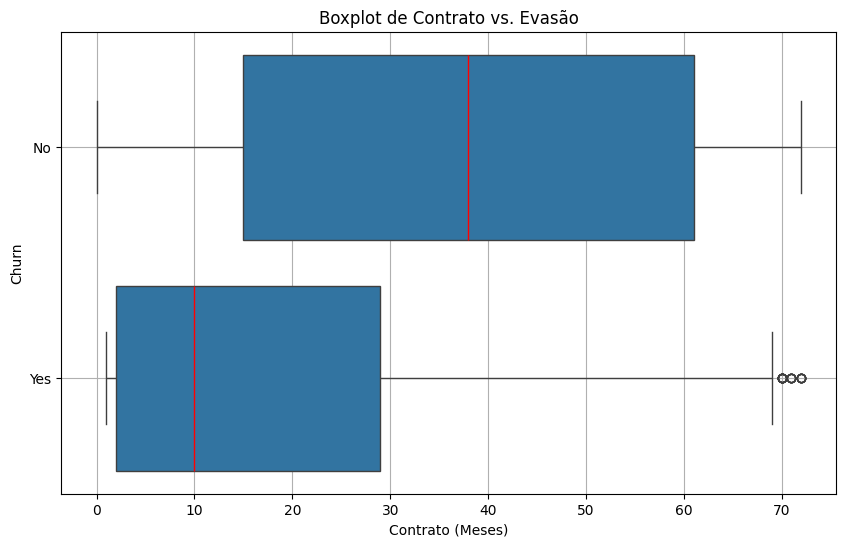

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='customer.tenure', y='Churn', medianprops={'color': 'red'})
plt.title('Boxplot de Contrato vs. Evasão')
plt.xlabel('Contrato (Meses)')
plt.ylabel('Churn')
plt.grid(True)
plt.show()

**Clientes que evadiram (Yes):**

A mediana do tempo de contrato está próxima de 10 meses.

O intervalo interquartil (Q1–Q3) vai aproximadamente de 3 a 30 meses, indicativo de que a maior parte dos clientes que saem possui contratos mais curtos.

Existem alguns outliers com mais de 70 meses.

**Clientes que permaneceram (No):**

A mediana está próxima de 38 meses, muito maior do que a dos clientes que evadiram.

O intervalo interquartil vai de aproximadamente 15 a 60 meses, mostrando que clientes fiéis costumam ter contratos bem mais longos.

Há uma maior dispersão, incluindo contratos de até 70+ meses, reforçando a permanência.

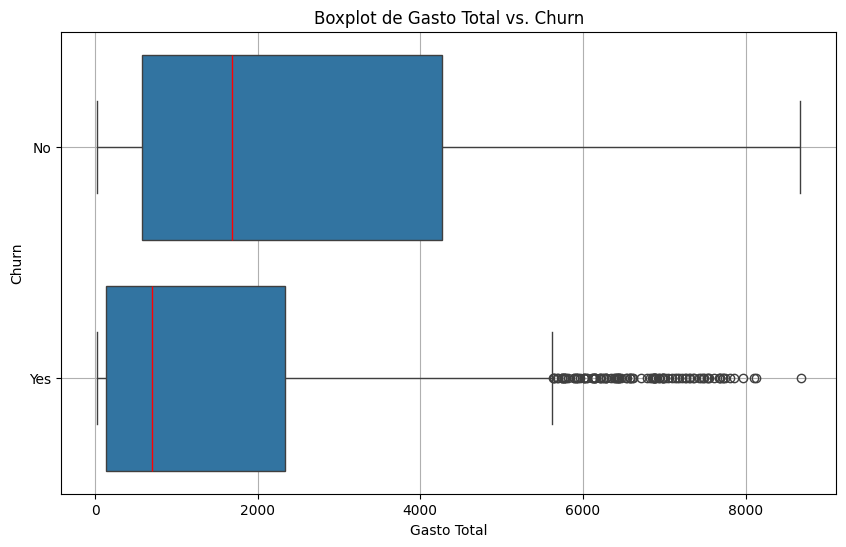

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='account.Charges.Total', y='Churn', medianprops={'color': 'red'})
plt.title('Boxplot de Gasto Total vs. Churn')
plt.xlabel('Gasto Total')
plt.ylabel('Churn')
plt.grid(True)
plt.show()

**Clientes que evadiram (Yes):**

A mediana dos gastos totais de está em torno de 800.

O intervalo interquartil (Q1–Q3) vai aproximadamente de 200 a prõximo de 2400, indicativo de que a maior parte dos clientes que saem possui gastos menores.

Existem alguns outliers com gastos acima de 8000.

**Clientes que permaneceram (No):**

A mediana dos gastos estã próxima a 1800, muito maior do que a dos clientes que evadiram.

O intervalo interquartil vai de aproximadamente 1500 a 4200 meses, mostrando que clientes fiéis costumam ter gastos maiores.


## 🤖 Modelos Preditivos

Importação da bibliotecas

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

 Separar features e target

In [39]:
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

Dividir treino e teste

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


**Normalizar**

- Vamos treinar Regressão Logística, que se beneficia da normalização. Por isso, normalizei os dados para esse modelo.

- Já o Random Forest não precisa da normalização — mas como você está usando os mesmos dados para ambos os modelos, o normalizei para manter consistência e simplicidade.

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Balancear treino com SMOTE**

Pois ja verificamos anterioemente que a proporção do churn estava desbalanceada

In [53]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

**Regressão Logística**

In [54]:
# Instanciar e treinar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Previsões
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Regressão Logística
Acurácia: 0.7502369668246446
ROC AUC: 0.8453628296790868
Matriz de Confusão:
 [[1129  420]
 [ 107  454]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



**Random Forest**

In [44]:
# Instanciar e treinar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Previsões
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("Random Forest")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Acurácia: 0.7786729857819905
ROC AUC: 0.8241588788810905
Matriz de Confusão:
 [[1307  242]
 [ 225  336]]
              precision    recall  f1-score   support

       False       0.85      0.84      0.85      1549
        True       0.58      0.60      0.59       561

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110



## Avaliação do modelos preditivos.

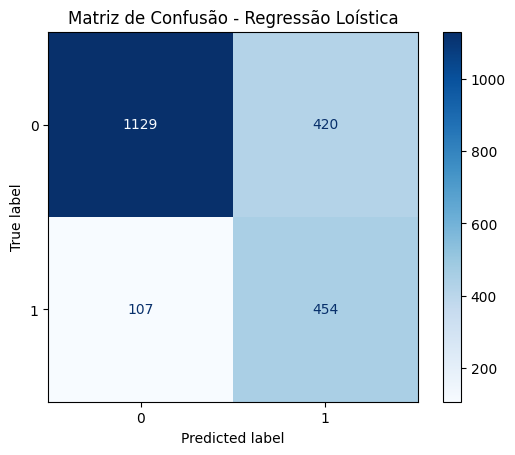

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


cm_lr = confusion_matrix(y_test, y_pred_lr)


disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - Regressão Loística')
plt.show()

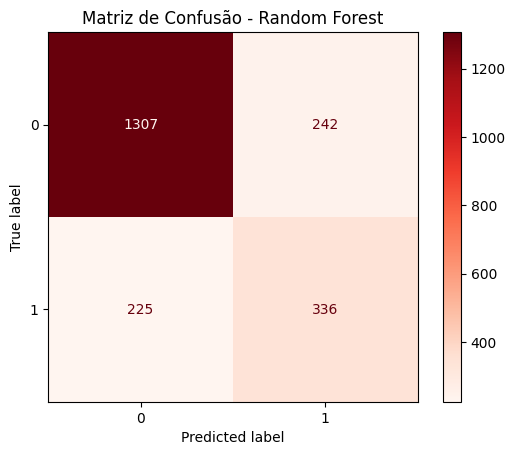

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap=plt.cm.Reds)
plt.title('Matriz de Confusão - Random Forest')
plt.show()

### Avaliaçáo dos modelos preditivos utilizados

#### Regressáo Logística
1. Acurãria de 77,8%;
2. ROC AUC de 84,5%;

3. Clientes que permaneceram
* Precisão 91%

* Recall 73%

* F1-Score 81%

4.  Clientes que evadiram

* Precisão 52%

* Recall 81%

* F1-Score 63%


**A Matriz de Confusáo de Regressáo Logística apresentou os seguintes resultados:**

* Verdadeiros Positivos (VP): 454

* Falsos Negativos (FN): 107

* Verdadeiros Negativos (VN): 1129

* Falsos Positivos (FP): 420


#### Random Forest

1. Acurãria de 75,02%;
2. ROC AUC de 85%;

3. Clientes que permaneceram
* Precisão 85%

* Recall 84%

* F1-Score 85%


4.  Clientes que evadiram

* Precisão 58%

* Recall 58%

* F1-Score 59%0

 **A Matriz de Confusáo de Random Forest apresentou os seguintes resultados:**

* Verdadeiros Positivos (VP): 336

* Falsos Negativos (FN): 225

* Verdadeiros Negativos (VN): 1307

* Falsos Positivos (FP): 242

#### Comparação de Resultados
1. Acurácia

Regressão Logística: 77,8%
Random Forest: 75,2

A regressão logística teve acurácia ligeiramente maior.

2. ROC AUC (capacidade de separação entre classes)
Regressão Logística: 84,5%
Random Forest: 85%

Random Forest é mais robusto para distinguir evasores de não evasores, mesmo que sua acurácia total seja menor.

3. Matriz de Confusão

Random Forest identifica mais evasores (336 vs 305) e erra menos ao não detectar (225 vs 256).
Regressão Logística é melhor para identificar quem permanece (1379 vs 1307) e tem menos falsos alarmes (173 vs 242).

4. Precisão, Recall e F1 (classe Evadiu)

Regressão Logística

* Precisão: 63,8%

* Recall: 54,4%

* F1-Score: 58,7%

Random Forest

* Precisão: 58%

* Recall: 60%

* F1-Score: 59%

Random Forest tem maior Recall (detecta mais evasores), mas menor Precisão (mais alarmes falsos).

Os doi modelos tên F1 similares (~59%), mas a força do Random Forest é capturar mais casos de evasão.




### Verificaçâo de Overfitting e Underfitting

In [48]:
# Calculando a acurácia do treino
y_train_pred_lr = lr.predict(X_train_scaled)
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)

# Calculando a acurária do teste
y_test_pred_lr = lr.predict(X_test_scaled)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)

print(f"Acurácia no conjunto de treino (Regressão Logística): {train_accuracy_lr:.4f}")
print(f"Acurácia no conjunto de teste (Regressão Logística): {test_accuracy_lr:.4f}")

Acurácia no conjunto de treino (Regressão Logística): 0.7599
Acurácia no conjunto de teste (Regressão Logística): 0.7502


In [51]:
# Calculate accuracy on the training set
y_train_pred_rf = rf.predict(X_train_scaled)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf) # Use original y_train for accuracy

# Calculate accuracy on the testing set
y_test_pred_rf = rf.predict(X_test_scaled)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"Acurácia no conjunto de treino (Random Forest): {train_accuracy_rf:.4f}")
print(f"Acurácia no conjunto de teste (Random Forest): {test_accuracy_rf:.4f}")

Acurácia no conjunto de treino (Random Forest): 0.9986
Acurácia no conjunto de teste (Random Forest): 0.7787


 #### Observaçôes
 A partir dos valores de acurácia do modelo de Regressâo Logística pudemos compreender que **nâo** ocorreu Overfitting no modelo. No entanto, o modelo Random Forest, com acurácia de praticamente 100% no conjunto de treino, evidencia que **ocorreu** Overfitting no modelo.  

## Análise das variáveis


In [56]:
import pandas as pd
import numpy as np

# Coeficientes da regressão logística
coef = lr.coef_[0]

# Criar DataFrame com variáveis e seus coeficientes
importance_lr = pd.DataFrame({
    'Variável': X.columns,  # Use column names from original X
    'Coeficiente': coef,
    'Impacto': np.exp(coef)  # razão de chances (odds ratio)
}).sort_values(by='Coeficiente', ascending=False)

print("Importância das variáveis - Regressão Logística")
print(importance_lr)

Importância das variáveis - Regressão Logística
                                         Variável  Coeficiente   Impacto
4                           account.Charges.Total     0.903952  2.469343
11           internet.InternetService_Fiber optic     0.748741  2.114335
17                       internet.StreamingTV_Yes     0.251362  1.285775
18                   internet.StreamingMovies_Yes     0.208032  1.231253
23         account.PaymentMethod_Electronic check     0.201215  1.222887
21                   account.PaperlessBilling_Yes     0.188428  1.207350
10                        phone.MultipleLines_Yes     0.115392  1.122314
15                  internet.DeviceProtection_Yes     0.070145  1.072663
0                          customer.SeniorCitizen     0.065627  1.067829
14                      internet.OnlineBackup_Yes     0.029576  1.030017
24             account.PaymentMethod_Mailed check     0.013424  1.013515
9            phone.MultipleLines_No phone service     0.005142  1.005155
5  

Um coeficiente positivo aumenta a probabilidade de evasão (churn).

Um coeficiente negativo reduz a probabilidade de evasão (indica permanência).

O valor do coeficiente é proporcional à intensidade do efeito

In [59]:
# Importância das variáveis no Random Forest
importances_rf = rf.feature_importances_

importance_rf = pd.DataFrame({
    'Variável': X.columns, # Use column names from the original X
    'Importância': importances_rf
}).sort_values(by='Importância', ascending=False)

print("Importância das variáveis - Random Forest")
print(importance_rf)

Importância das variáveis - Random Forest
                                         Variável  Importância
1                                 customer.tenure     0.141730
4                           account.Charges.Total     0.121221
3                         account.Charges.Monthly     0.110457
2                                       Total.Day     0.106599
20                      account.Contract_Two year     0.064828
23         account.PaymentMethod_Electronic check     0.056117
11           internet.InternetService_Fiber optic     0.048645
21                   account.PaperlessBilling_Yes     0.034446
19                      account.Contract_One year     0.033265
16                       internet.TechSupport_Yes     0.031221
6                            customer.Partner_Yes     0.028447
13                    internet.OnlineSecurity_Yes     0.028281
5                            customer.gender_Male     0.025636
14                      internet.OnlineBackup_Yes     0.020883
7            

Valores mais altos, como Custumer Ternure, Total.Day e Account Charges Minthly significam que a variável foi mais usada nas divisões das árvores e, portanto, tem maior poder preditivo.

Importâncias não indicam direção (se aumenta ou reduz churn), apenas o peso relativo da variável.

# Conclusões

### Fatores que Influenciam a Evasão

Com base nos coeficientes da Regressão Logística e nas importâncias do Random Forest, destacam-se:

**Tempo de contrato (Tenure)**

* Clientes com contratos curtos apresentam maior propensão à evasão.

* Confirmado pelo boxplot: mediana do tempo de contrato dos evasores é muito menor do que a dos que permanecem.

**Gasto Total (Total Charges)**

Clientes com baixo gasto acumulado têm maior probabilidade de churn.

Os que permanecem apresentam gastos significativamente mais elevados.

**Cobrança Mensal (Monthly Charges)**

Valores mensais elevados, sem contrapartida de fidelização, tendem a aumentar o risco de evasão.

Indicam clientes que podem estar insatisfeitos com o custo-benefício.

**Tipo de contrato (Mensal x Longo Prazo)**

* Contratos mensais aumentam a chance de churn (mais flexibilidade para sair).

* Contratos anuais ou de longo prazo estão associados a maior permanência.

**Serviços adicionais (ex.: Internet, TV, suporte técnico)**

* Clientes que não utilizam serviços adicionais tendem a ter menor engajamento, o que aumenta o risco de evasão.

### Estratégias de Retenção

Com base na análise proposta, as seguintes ações podem ser propostas:

**Programas de Fidelização**

* Oferecer descontos ou benefícios progressivos conforme o cliente aumenta o tempo de permanência.

* Criar contratos mais longos com vantagens financeiras.

**Engajamento inicial**

* Os primeiros meses são críticos (alto risco de churn).

* Acompanhamento personalizado e suporte proativo reduzem a evasão precoce.

**Política de preços mais flexível**

* Identificar clientes com cobranças mensais elevadas e oferecer pacotes mais adequados ao perfil de consumo.

* Oferta de serviços complementares(preminum)

* Incentivar a adesão a serviços extras, aumentando a satisfação e o custo de oportunidade da saída.

**Monitoramento de clientes de baixo gasto**

* Criar alertas para clientes com baixo gasto acumulado, abordando-os com ofertas ou suporte personalizado antes que evadam.